In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from hpcom.channel import create_channel_parameters, full_line_model_default, full_line_model_wdm, full_line_model, full_line_model_back_to_back
from hpcom.signal import create_wdm_parameters, generate_wdm, nonlinear_shift

2023-01-19 17:42:16.623579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import hpcom
from importlib import reload
reload(hpcom)

<module 'hpcom' from '/home/esf0/anaconda3/envs/nn_env/lib/python3.9/site-packages/hpcom/__init__.py'>

In [2]:
# create parameters
wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=-4, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=1.2,
                                    noise_figure_db=-200,
                                    dispersion_parameter=16.8,
                                    dz=5)

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')), tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-01-19 17:42:22.325655: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-19 17:42:22.326335: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-19 17:42:22.399301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 17:42:22.399658: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2023-01-19 17:42:22.399675: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-19 17:42:22.400702: I tensorflow/stream_executor/p

In [4]:
result = full_line_model(channel, wdm, verbose=2)

2023-01-19 17:42:25.211303: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 17:42:25.211855: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-19 17:42:25.212055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 17:42:25.212406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidt

propagation took 729.1959999999999 ms
search x and y points took 10.841999999999999 ms
ber for x and y took 27.532 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [5]:
points_x = result['points_x']
points_x_orig = result['points_x_orig']
points_x_shifted = result['points_x_shifted']
points_y = result['points_y']
points_y_orig = result['points_y_orig']
points_y_shifted = result['points_y_shifted']

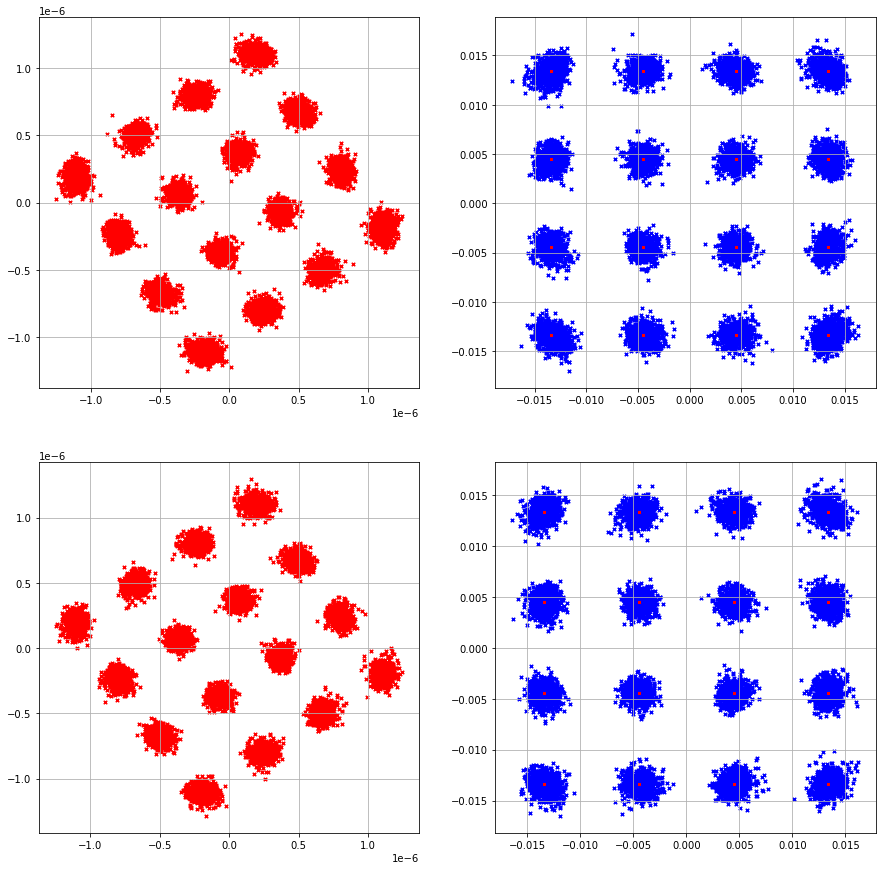

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x.real, points_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_shifted.real, points_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_x_orig.real, points_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_y.real, points_y.imag, s=12, c='r', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_y_orig.real, points_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [8]:
result_wdm = full_line_model_wdm(channel, wdm, channels_type='middle', verbose=2)

propagation took 713.171 ms
search x and y points took 11.346 ms
ber for x and y took 27.514 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [63]:
points_wdm_x = result_wdm['points_x']
points_wdm_x_orig = result_wdm['points_x_orig'][0]
points_wdm_x_shifted = result_wdm['points_x_shifted']
points_wdm_y = result_wdm['points_y']
points_wdm_y_orig = result_wdm['points_y_orig'][0]
points_wdm_y_shifted = result_wdm['points_y_shifted']

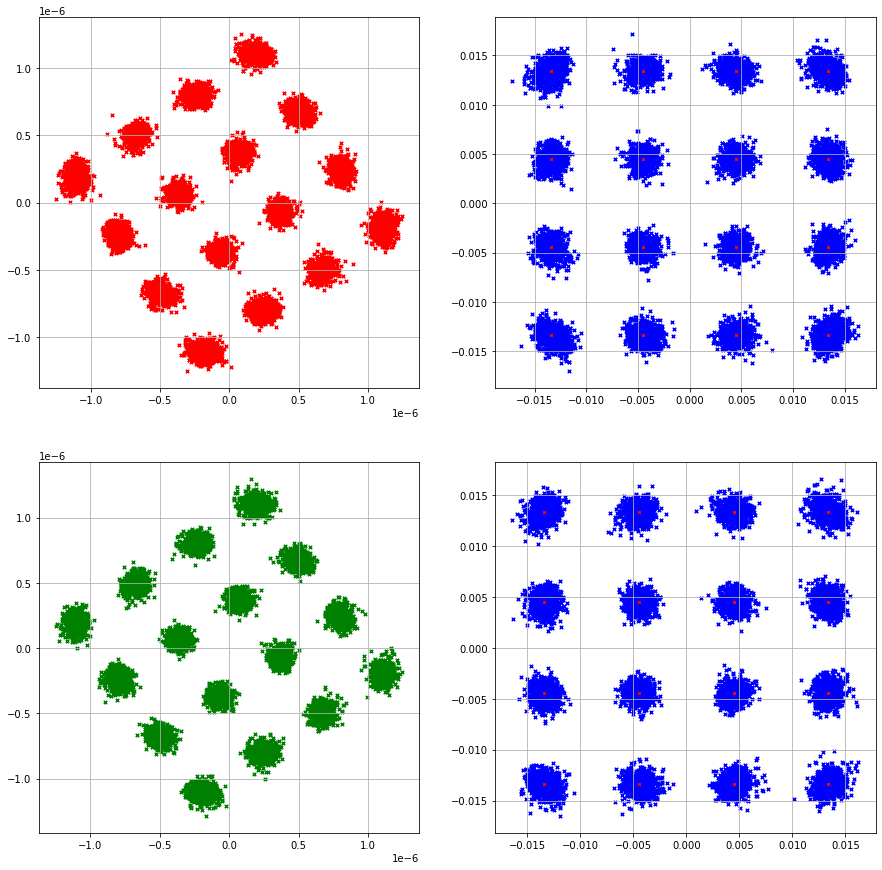

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_wdm_x.real, points_wdm_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_wdm_x_shifted.real, points_wdm_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_wdm_x_orig.real, points_wdm_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_wdm_y.real, points_wdm_y.imag, s=12, c='green', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_wdm_y_shifted.real, points_wdm_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_wdm_y_orig.real, points_wdm_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

In [55]:
nonlinear_shift(points_x, points_x_orig)

(15521.753935558-6569.466242305321j)

## Backward

In [7]:
result_back = full_line_model_back_to_back(channel, wdm, verbose=3)

Average signal power (x / y): 0.0001992 / 0.0001984 (has to be close to 0.0001991)
forward propagation took 745.6610000000001 ms
Signal energy before propagation (x / y): 2.5169515595143527e-05 2.506269862640572e-05
Signal energy after propagation (x / y): 2.5169515595145916e-05 2.506269862640807e-05
Signal energy difference (x / y): 2.388632911257127e-18 2.3479753297889205e-18
backward propagation took 706.705 ms
Signal energy before propagation (x / y): 2.5169515595143527e-05 2.506269862640572e-05
Signal energy after propagation (x / y): 2.5169515595145916e-05 2.506269862640807e-05
Signal energy after backward propagation (x / y): 2.5169515595148704e-05 2.506269862641082e-05
Signal energy difference (x / y): 2.388632911257127e-18 2.3479753297889205e-18 5.177065373618284e-18 5.099138342470888e-18
search x and y points took 10.811 ms
ber for x and y took 26.408 ms
BER (x / y): (0.0, 0) (0.0, 0)
Q^2-factor (x / y): inf inf


In [8]:
points_back_x = result_back['points_x']
points_back_x_orig = result_back['points_x_orig']
points_back_x_shifted = result_back['points_x_shifted']
points_back_y = result_back['points_y']
points_back_y_orig = result_back['points_y_orig']
points_back_y_shifted = result_back['points_y_shifted']

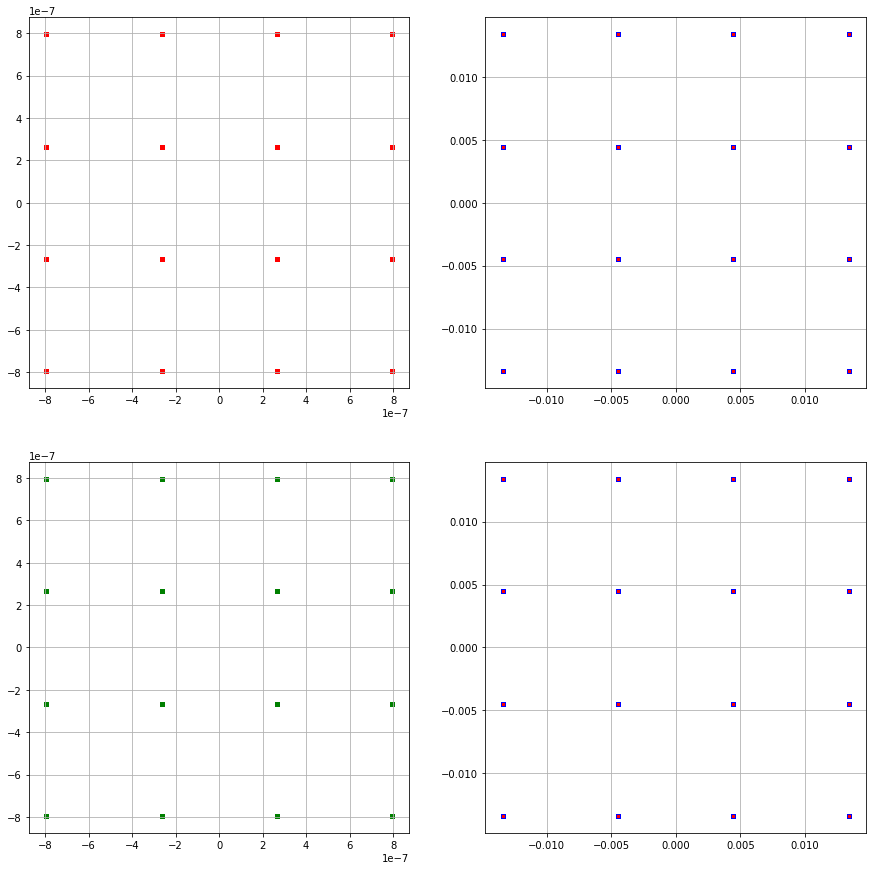

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_back_x.real, points_back_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_back_x_shifted.real, points_back_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_back_x_orig.real, points_back_x_orig.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_back_y.real, points_back_y.imag, s=12, c='green', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_back_y_shifted.real, points_back_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_back_y_orig.real, points_back_y_orig.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

### Handmode

In [12]:
from ssfm_gpu.propagation import propagate_manakov, propagate_manakov_backward

import numpy as np

In [14]:
channel = create_channel_parameters(n_spans=12,
                                     z_span=80,
                                     alpha_db=0.2,
                                     gamma=1.2,
                                     noise_figure_db=-200,
                                     dispersion_parameter=16.8,
                                     dz=1)

wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)

channel_back = channel.copy()
channel_back['z_span'] = -channel['z_span']
channel_back['alpha_db'] = -channel['alpha_db']
channel_back['alpha'] = -channel['alpha']

channel_backward = channel.copy()
channel_backward['z_span'] = -channel['z_span']


In [15]:
signal_x_init, signal_y_init, wdm_info = generate_wdm(wdm)

dt = 1. / wdm['sample_freq']
t = dt * np.arange(len(signal_x_init))

# generate_wdm is for multichannel wdm
# for only one channel we have to take [0] element in list
# that will correspond to desired values
points_x_orig = wdm_info['points_x'][0]
points_y_orig = wdm_info['points_y'][0]
ft_filter_values = wdm_info['ft_filter_values_x'][0]

signal_x_prop, signal_y_prop = propagate_manakov(channel, signal_x_init, signal_y_init, wdm['sample_freq'])
signal_x_prop2, signal_y_prop2 = propagate_manakov(channel, signal_x_prop, signal_y_prop, wdm['sample_freq'])
signal_x, signal_y = propagate_manakov(channel_back, signal_x_prop, signal_y_prop, wdm['sample_freq'])
signal_x_back, signal_y_back = propagate_manakov_backward(channel_backward, signal_x_prop, signal_y_prop, wdm['sample_freq'])


In [16]:
print(np.mean(np.absolute(signal_x)),
      np.max(np.absolute(signal_x - signal_x_init)),
      np.mean(np.absolute(signal_x - signal_x_init)),
      np.max(np.absolute(signal_x - signal_x_init)) / np.mean(np.absolute(signal_x)))

print(np.mean(np.absolute(signal_x_back)),
      np.max(np.absolute(signal_x_back - signal_x_init)),
      np.mean(np.absolute(signal_x_back - signal_x_init)),
      np.max(np.absolute(signal_x_back - signal_x_init)) / np.mean(np.absolute(signal_x_back)))

0.020697901392807017 0.0028838181098695343 0.0007164057831686216 0.13932900998705722
0.02069669969761329 2.9250312473621146e-12 7.144523229600192e-13 1.4132839003792593e-10


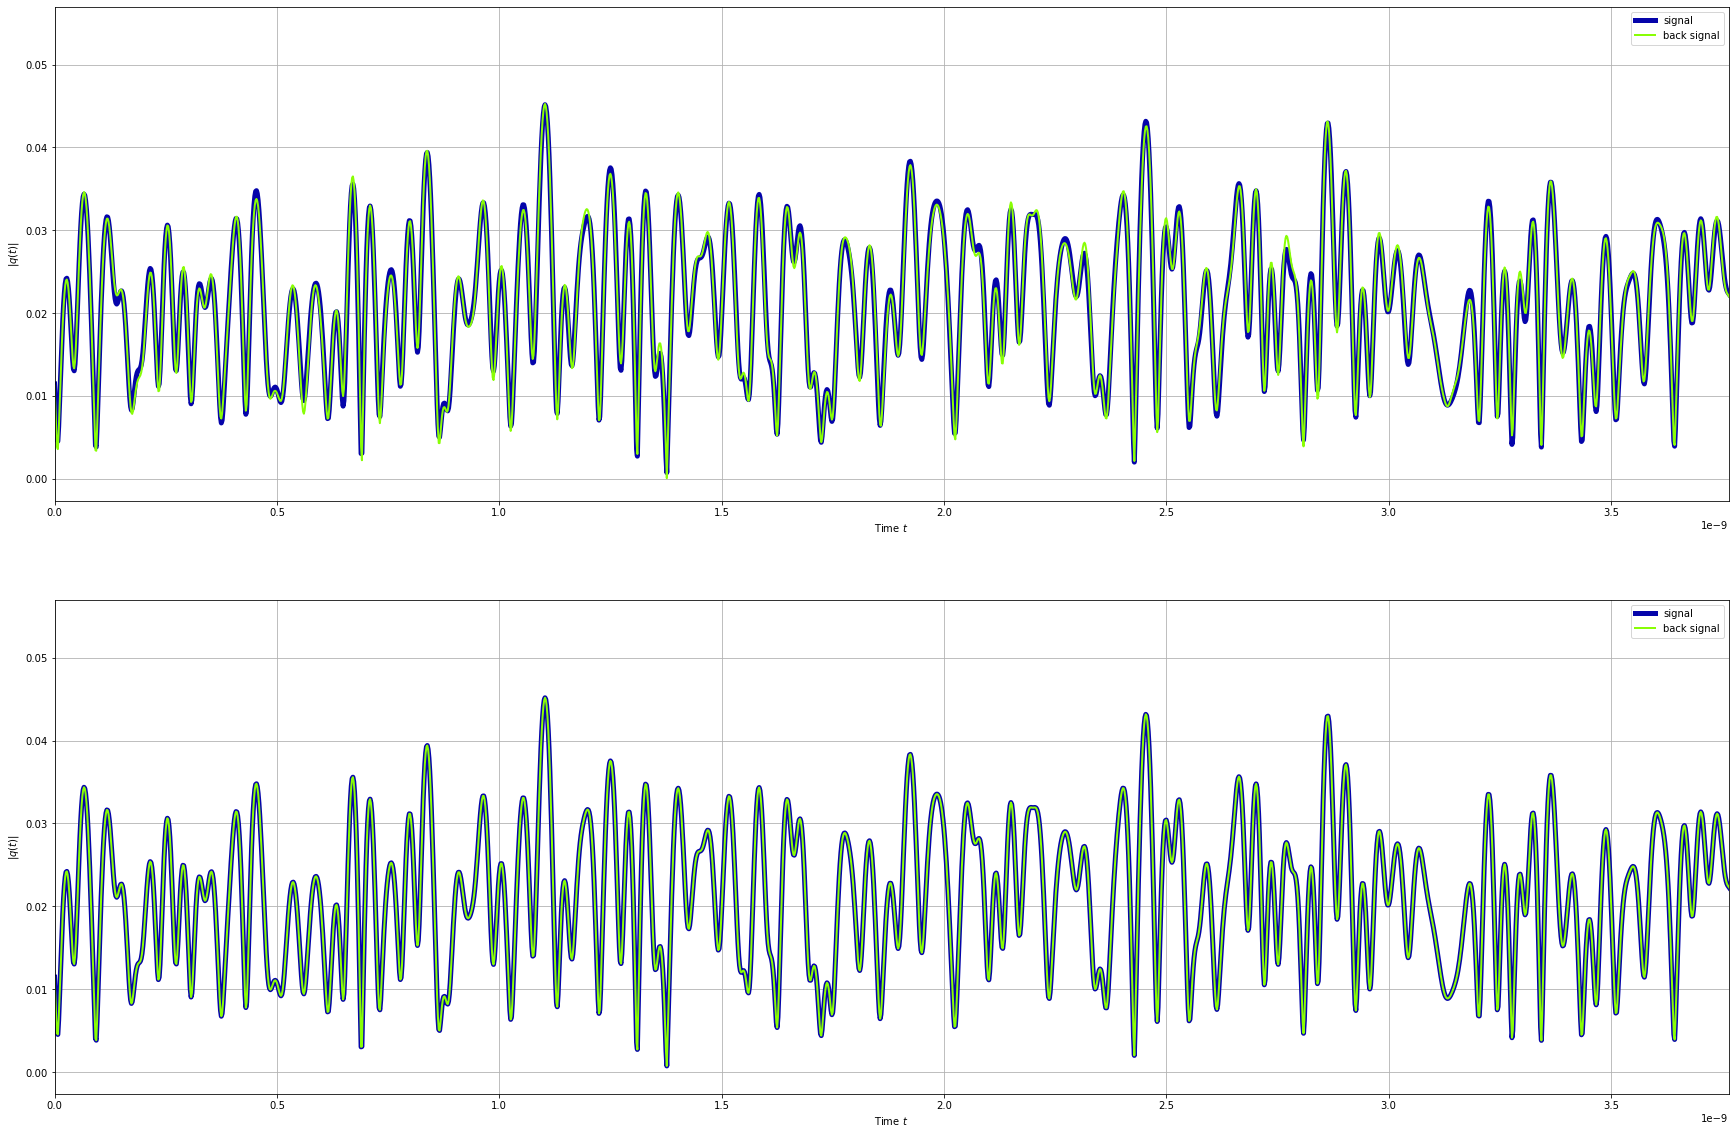

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(30,20))
axs[0].plot(t, np.absolute(signal_x_init),
               color='xkcd:royal blue', linewidth=5,
               label='signal')
axs[0].plot(t, np.absolute(signal_x),
               color='xkcd:lime green', linewidth=2,
               label='back signal')
axs[0].set_xlabel('Time $t$')
axs[0].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[0].set_ylabel(r'$|q(t)|$')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, np.absolute(signal_x_init),
               color='xkcd:royal blue', linewidth=5,
               label='signal')
axs[1].plot(t, np.absolute(signal_x_back),
               color='xkcd:lime green', linewidth=2,
               label='back signal')
axs[1].set_xlabel('Time $t$')
axs[1].set_xlim(t[0], t[2048])
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[1].set_ylabel(r'$|q(t)|$')
axs[1].legend()
axs[1].grid(True)

In [36]:
# Helper function to xor two characters
def xor_c(a, b):
    return int(0) if (a == b) else int(1)


# Helper function to flip the bit
def flip(c):
    return int(1) if (c == int(0)) else int(0)


# function to convert binary string
# to gray string
def binarytoGray(binary, num_bits_symbol):
    gray = np.zeros((len(binary),), dtype=int)
    # MSB of gray code is same as
    # binary code
    NN = int(len(binary) / num_bits_symbol)
    count = 0
    for ij in range(0, NN):
        gray[count] = binary[count]
        for j in range(count + 1, count + num_bits_symbol):
            gray[j] = xor_c(binary[j - 1], binary[j])
        count = count + num_bits_symbol
    return gray

num_bits_symbol = 4
n_bits = int(num_bits_symbol * wdm['n_symbols'])

bits_x = np.random.randint(0, 2, n_bits, int)  # Random bit stream
gray_x = binarytoGray(bits_x, num_bits_symbol)
bits_y = np.random.randint(0, 2, n_bits, int)  # Random bit stream
gray_y = binarytoGray(bits_y, num_bits_symbol)

bits_x_temp = ''.join(str(k) for k in bits_x)
bits_y_temp = ''.join(str(k) for k in bits_y)


In [35]:
print(bits_x[:10])
print(str(bits_x[:10]))
bits_x_temp = ''.join(str(k) for k in bits_x[:10])
print(bits_x_temp)

[1 0 1 1 0 0 0 1 0 1]
[1 0 1 1 0 0 0 1 0 1]
1011000101


In [34]:
import random
bits = random.getrandbits(n_bits)
data = "{0:b}".format(int(bits))
if len(data) < n_bits:
    data = ''.join('0' for add_bit in range(n_bits - len(data))) + data

print(data[:10])

1001010110


In [18]:
wdm = create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                            downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2)


channel = create_channel_parameters(n_spans=12,
                                    z_span=80,
                                    alpha_db=0.0,
                                    gamma=1.2,
                                    noise_figure_db=-200,
                                    dispersion_parameter=16.8,
                                    dz=1)

In [37]:
result = full_line_model(channel, wdm, bits=([bits_x_temp], [bits_y_temp]), verbose=2)

UnboundLocalError: local variable 'points_x' referenced before assignment